# Import packages and data 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==0.23.0 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


# Load FBM raw dataset

In [4]:
adata = sc.read("/Users/b8058304/Documents/PhD_work/Coding/bm_plus_19pcw/data/bm_plus_19pcw_raw_dr_20201007.h5ad")

In [5]:
from scipy.sparse import csr_matrix
adata.X = sparse.csr_matrix(adata.X)

In [6]:
adata.raw = adata

In [7]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD4 T cell                   327
CD8 T cell                   171
CD14 monocyte               8763
CD56 bright NK               449
CMP                          425
DC1                           50
DC2                          598
DC3                          705
DC precursor                 201
ELP                         1357
GMP                         1281
HSC                           92
ILC precursor                 67
LMPP                          34
MEMP                          16
MEP                          269
MK                          1000
MOP                         3838
MPP myeloid                   92
NK T cell                    111
NK progenitor                 26
Treg                          62
adipo-CAR                    353
arteriolar fibroblast         83
basophil                     139
chondrocyte                   80
early MK                    1624
early erythroid             7474
early osteoblast             280
endosteal fibroblast          5

In [8]:
cell_numbers = adata.obs.groupby(["orig.ident"]).apply(len)
cell_numbers

orig.ident
F21         3142
F29         8161
F30        10412
F38         3115
F41         7907
F45         6602
F50        15762
F51        28801
SB19PCW    19326
dtype: int64

# Add QC

In [9]:
# add the total counts per cell as observations-annotation to adata
adata.obs['nUMI'] = adata.X.sum(axis=1)
sc.pp.calculate_qc_metrics(adata, var_type='genes', layer=None, use_raw=False, inplace=True, parallel=None)
adata.obs["nGene"] = adata.obs["n_genes_by_counts"]

del adata.obs["n_genes_by_counts"]
del adata.obs["log1p_n_genes_by_counts"]
del adata.obs["log1p_total_counts"]
del adata.obs["total_counts"]
del adata.obs["pct_counts_in_top_50_genes"]
del adata.obs["pct_counts_in_top_100_genes"]
del adata.obs["pct_counts_in_top_200_genes"]
del adata.obs["pct_counts_in_top_500_genes"]
del adata.var["n_cells_by_counts"]
del adata.var["mean_counts"]
del adata.var["log1p_mean_counts"]
del adata.var["pct_dropout_by_counts"]
del adata.var["total_counts"]
del adata.var["log1p_total_counts"]

In [10]:
mito_genes = adata.var_names.str.startswith('MT-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent.mito'] = np.sum(adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1

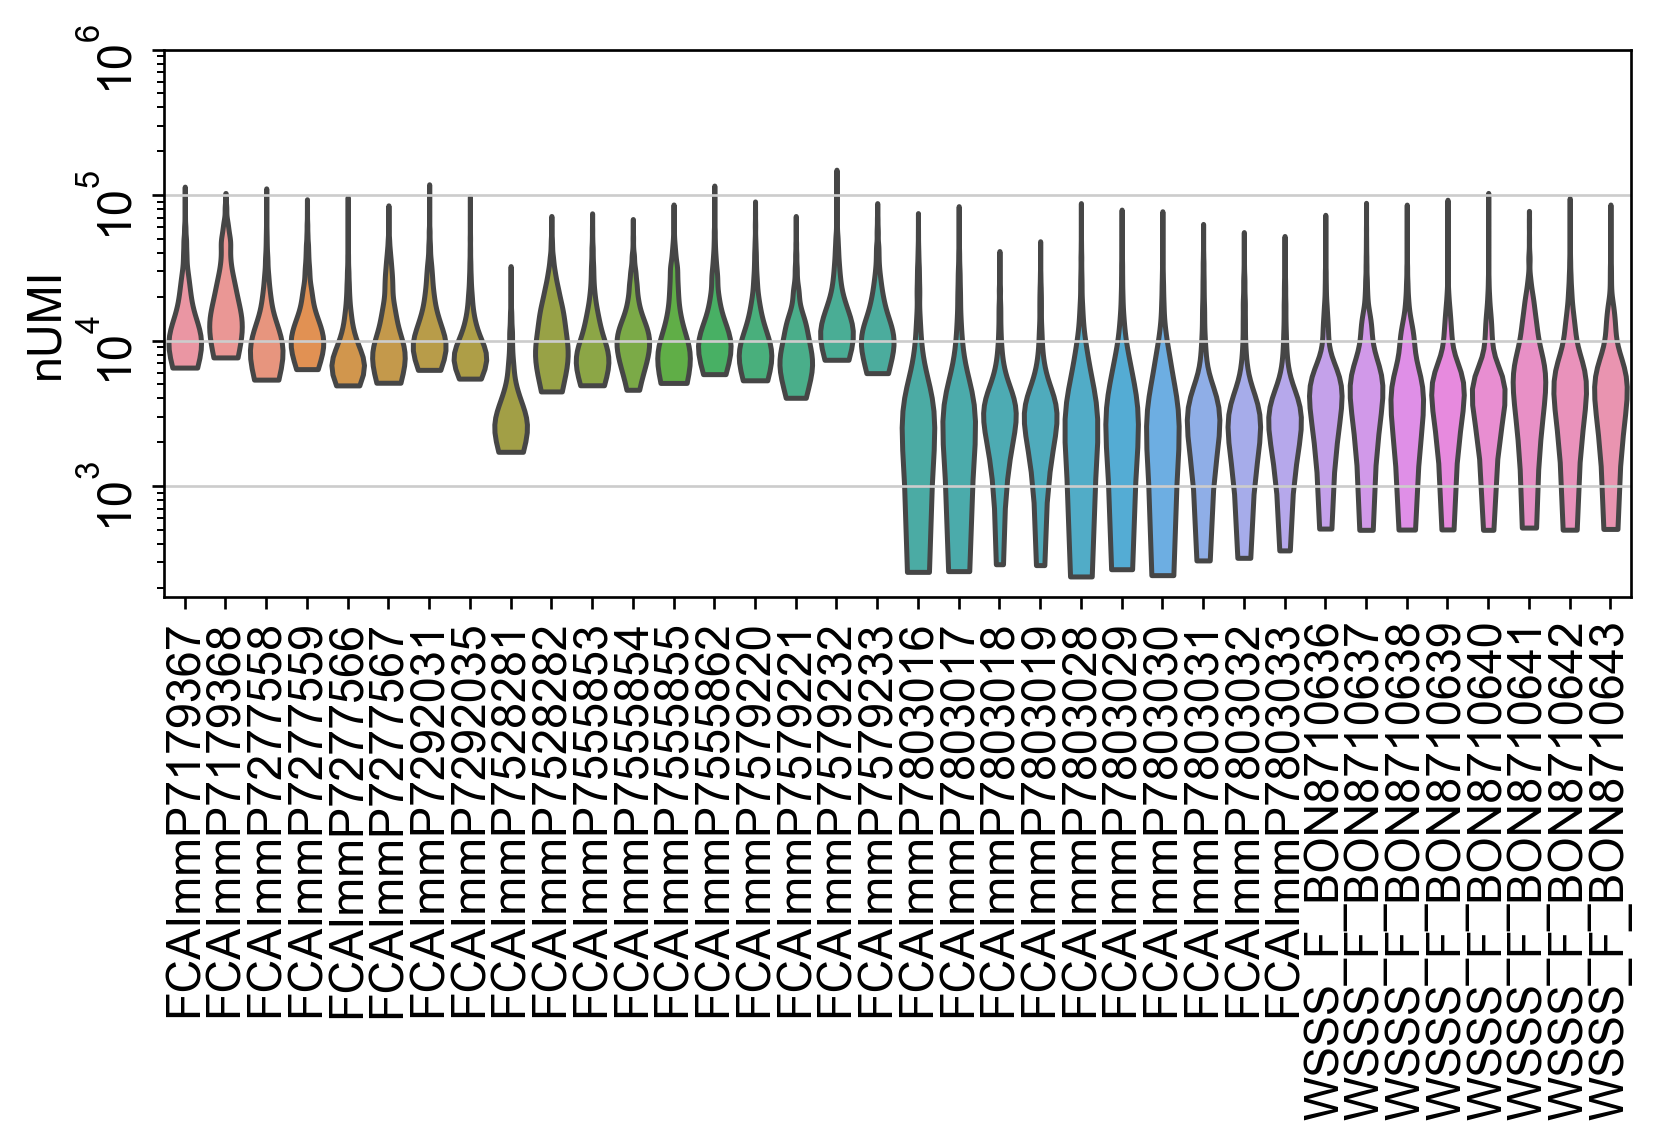

In [11]:
# Quality control - plot QC metrics

plt.rcParams["figure.figsize"] = (7,3)
 
ax=sc.pl.violin(adata, 'nUMI', groupby='lanes', log=True, cut=0, stripplot=False, rotation=90, 
           show=False) 

ax.set_ylim(0, 1000000)

plt.savefig("figures/FBM_healthy_numi_violin_20210127.pdf")

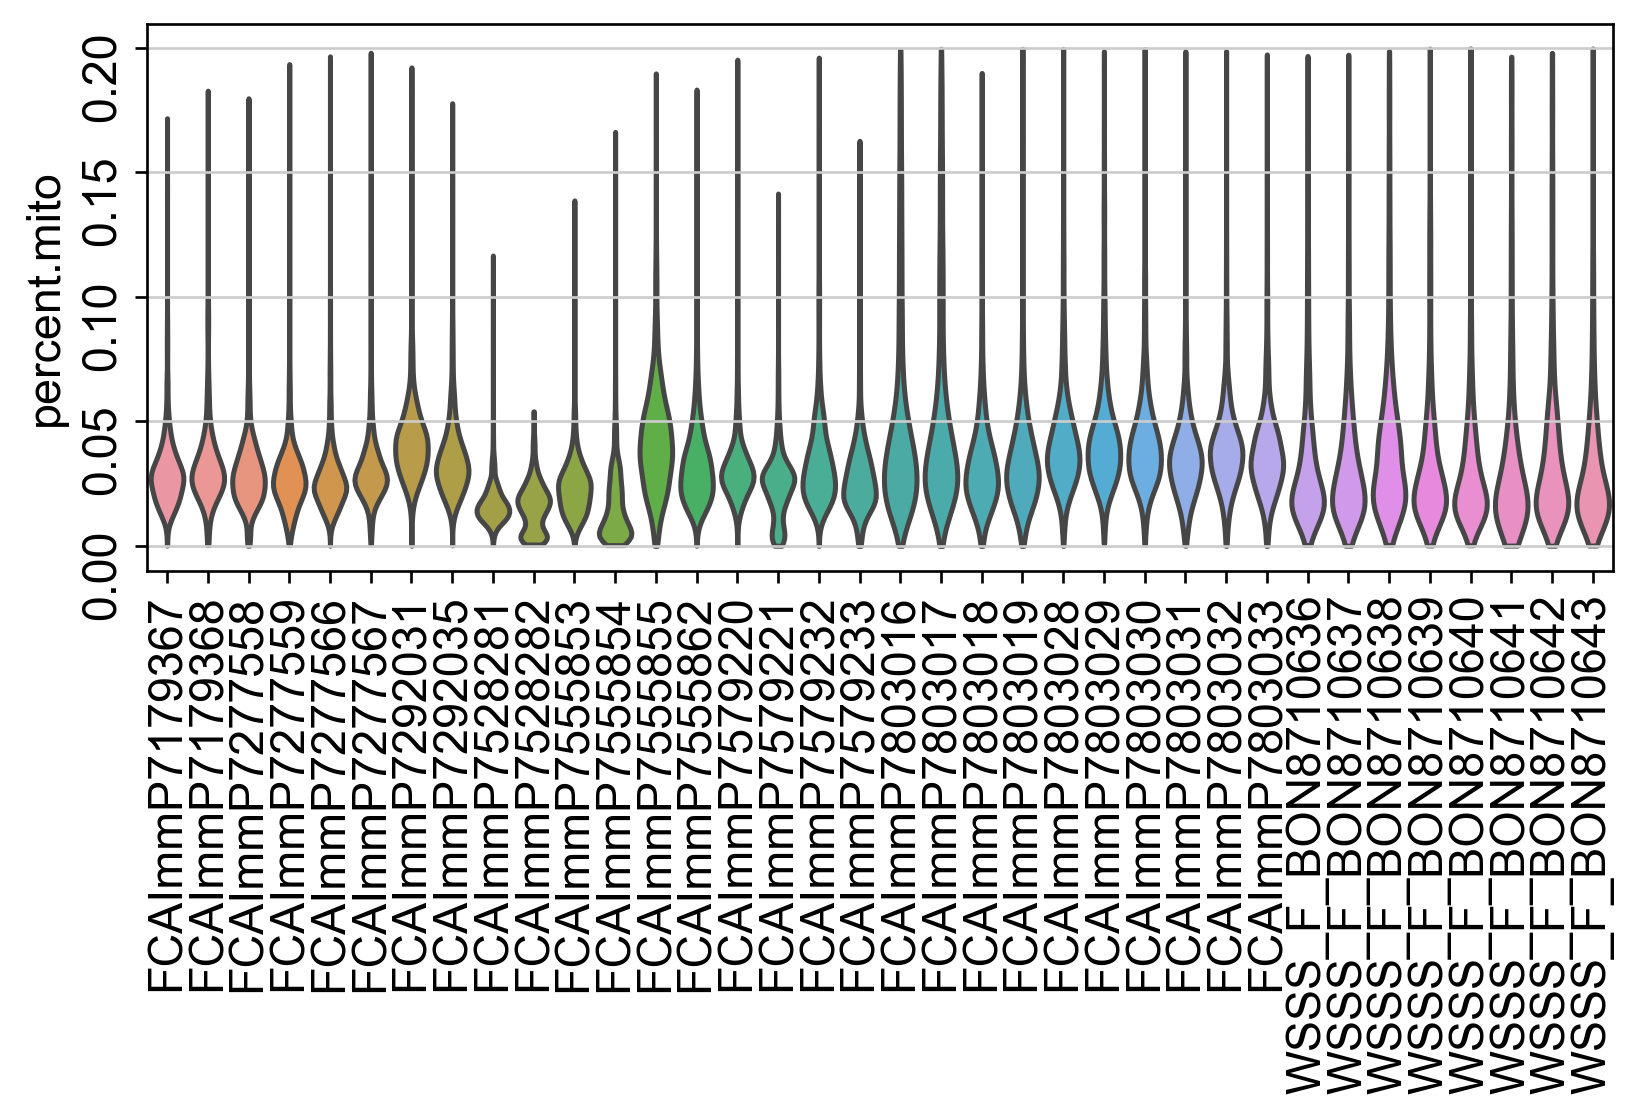

In [12]:
# Quality control - plot QC metrics

plt.rcParams["figure.figsize"] = (7,3)
 
ax=sc.pl.violin(adata, 'percent.mito', groupby='lanes', log=False,  stripplot=False, rotation=90, cut=0,
                        save="FBM_healthy_pmito_violin_20210127.pdf", show=True)

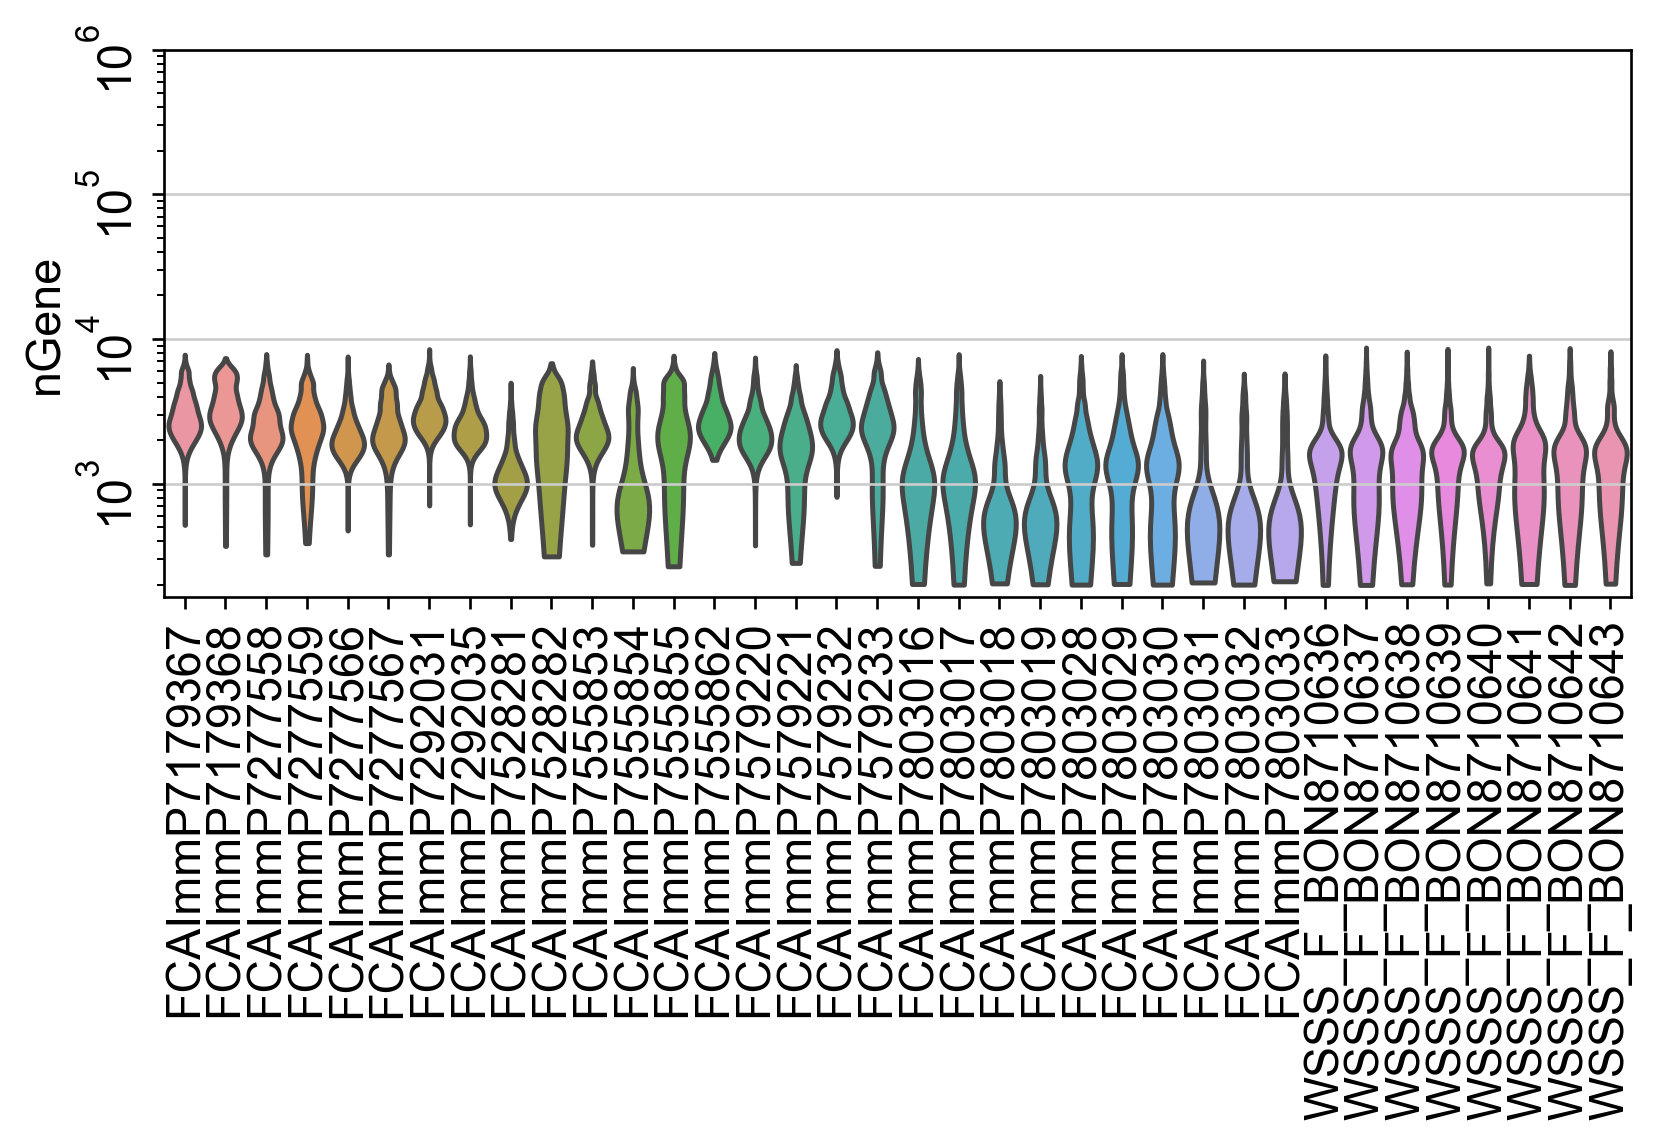

In [13]:
# Quality control - plot QC metrics

plt.rcParams["figure.figsize"] = (7,3)
 
ax=sc.pl.violin(adata, 'nGene', groupby='lanes', log=True, cut=0, stripplot=False, rotation=90, 
           show=False) 

ax.set_ylim(0, 1000000)

plt.savefig("figures/FBM_healthy_ngene_violin_20210208.pdf")